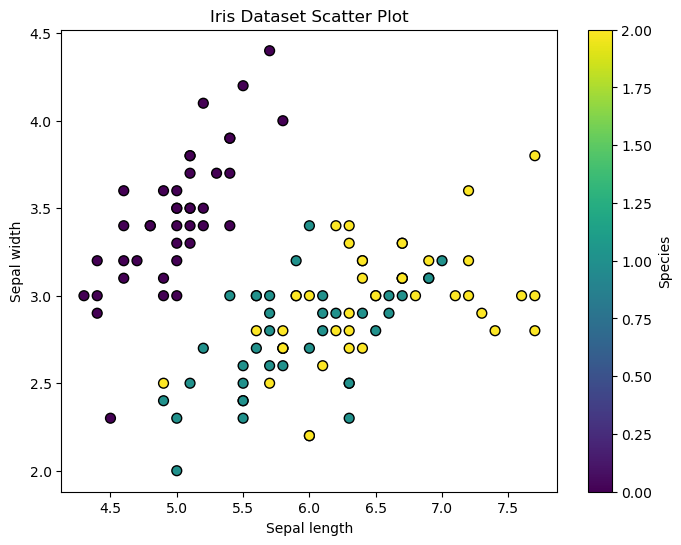

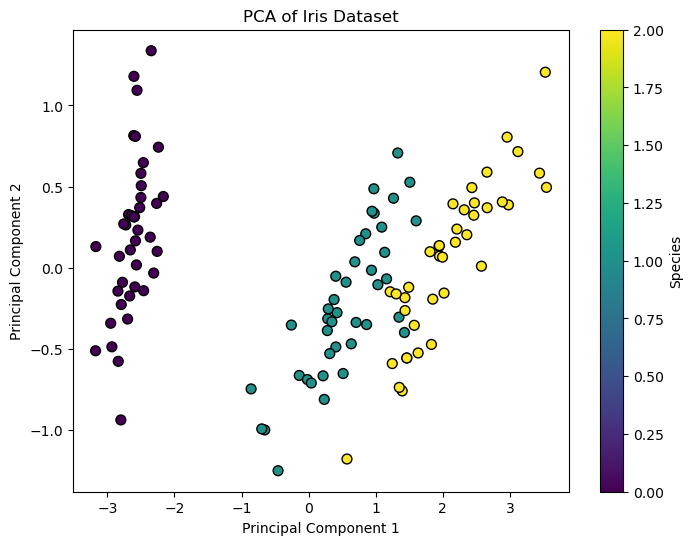

分类准确率： 1.0


In [1]:
# 1. 加载鸢尾花数据集
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

# 2. 划分数据集，训练集比例为0.2，随机种子为42
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. 绘制数据的散点图
# 以花萼长度为横轴，花萼宽度为纵轴
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
# X_train[:, 0]和X_train[:, 1]分别是训练集中花萼长度和花萼宽度的特征值。
# c=Y_train指定了每个点的颜色，根据鸢尾花的种类（标签）来确定，Y_train是一个数组，包含了每个样本对应的种类标签。
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Dataset Scatter Plot')
# 这行代码添加了一个颜色条，用于指示不同颜色对应的鸢尾花种类，label='Species'设置了颜色条的标签为“Species”（种类）。
plt.colorbar(label='Species')
plt.show()

# 4. 对特征进行PCA降维，并可视化降维后的结果
from sklearn.decomposition import PCA
# 这行代码创建了一个PCA对象，PCA是sklearn.decomposition模块中的一个类，用于执行主成分分析。
# n_components=2参数指定了降维后的特征数量
pca = PCA(n_components=2)
# fit_transform方法首先计算训练数据X_train的PCA变换，然后应用这个变换将数据降维到指定的维数（这里是2维）。
X_train_pca = pca.fit_transform(X_train)
# transform方法将之前在训练集上计算出的PCA变换应用到测试集X_test上，将测试集数据也降维到二维空间。
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Species')
plt.show()

# 5. 以K=3训练KNN分类器
from sklearn.neighbors import KNeighborsClassifier
# 创建了一个KNeighborsClassifier对象knn
# n_neighbors=3参数指定了在进行分类决策时考虑的最近邻居的数量
knn = KNeighborsClassifier(n_neighbors=3)
# fit方法用于训练KNN分类器
knn.fit(X_train_pca, Y_train)

# 6. 在测试集上进行测试，并输出分类准确率
from sklearn.metrics import accuracy_score
# 对降维后的测试集X_test_pca进行分类预测
Y_pred = knn.predict(X_test_pca)
# accuracy_score函数计算真实标签和预测标签之间的一致性，返回一个介于0和1之间的值，表示分类任务的准确率。
accuracy = accuracy_score(Y_test, Y_pred)
# 打印出分类器在测试集上的准确率
print("分类准确率：", accuracy)